In [1]:
from utils.imports import *

Using TensorFlow backend.


In [ ]:
a = np.array([[[1,2,3],[4,5,6][7,8,9]]])

In [ ]:
b= np.arange(16).reshape(4,4)  

In [ ]:
b

In [ ]:
b.shape

In [ ]:
b[::-1]

In [ ]:
b.T

In [ ]:
np.rot90(b, 3)

In [ ]:
np.rot90(b, 2)

In [ ]:
np.rot90(b, 1)

In [ ]:
np.fliplr(b)

In [ ]:
np.flipud(b)

In [ ]:
import random

In [ ]:
random.randint(-2,2)

In [ ]:
               np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_0_')+ '_3d_20_6_i.npy',trainX_1)
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_1_')+ '_3d_20_6_i.npy',trainX_1[::-1])
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_2_')+ '_3d_20_6_i.npy',trainX_1.T)
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_3_')+ '_3d_20_6_i.npy',np.rot90(trainX_1, 3))
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_4_')+ '_3d_20_6_i.npy',np.rot90(trainX_1, 2))
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_5_')+ '_3d_20_6_i.npy',np.fliplr(trainX_1))
                np.save(output_true + str(patient_id)+'_'+str(node_idx)+'_'+str('_6_')+ '_3d_20_6_i.npy',np.flipud(trainX_1))

In [ ]:
trainX_1= np.arange(48).reshape(3,4,4)  
trainX_1

In [ ]:
np.rot90(trainX_1, 3).transpose(1,2,0)

In [ ]:
np.fliplr(trainX_1)

In [ ]:
np.flipud(trainX_1)

In [ ]:
np.rot90(trainX_1, 1).transpose(1,2,0)

In [ ]:
random.choice([-2,-1,1,2])

In [ ]:
model = unet_model()

In [ ]:
model.train_on_batch()

In [7]:
aa = np.load('/Volumes/solo/ali/Data/train_mask/test_pred/LKDS-01004_pred.npy')

In [8]:
%matplotlib inline

([array([  2.62137000e+05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           7.00000000e+00]),
  array([  2.62122000e+05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           2.20000000e+01]),
  array([  2.62138000e+05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           6.00000000e+00]),
  array([  2.62143000e+05,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           1.00000000e+00]),
  array([ 262144.,       0.,       0.,       0.,       0.,       0.,
               0.,       0.,       0.,       0.]),
  array(

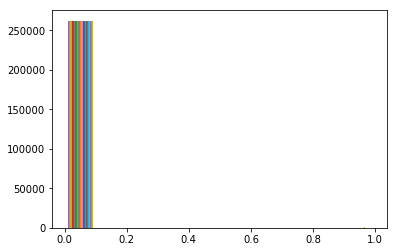

In [9]:
plt.hist(aa.tolist())

In [2]:
src = PATH['model_test_pred']
model_paths = PATH['model_final']
model_fenge_path=model_paths + 'final_fenge.h5'
model = load_model(model_fenge_path, custom_objects={'dice_coef_loss': dice_coef_loss, 'dice_coef': dice_coef})
#anno = pd.read_csv(csv_path + 'annotations.csv')

In [3]:
patients = [x for x in os.listdir(src) if 'orig' in x]

In [4]:
img_file = patients[0]

In [5]:
    patient_id = img_file[:-9]
    img_array = np.load(src + img_file)
    pos_annos = pd.read_csv(src + img_file[:-9] + '_annos_pos.csv')
    origin = np.array([pos_annos.loc[0]['origin_x'],pos_annos.loc[0]['origin_y'],pos_annos.loc[0]['origin_z']]) 
    spacing = np.array([pos_annos.loc[0]['spacing_x'],pos_annos.loc[0]['spacing_y'],pos_annos.loc[0]['spacing_z']]) 
    img_array_new = np.zeros_like(img_array)
    for i in range(img_array.shape[0]):
        img = img_array[i]
        #img = skimage.morphology.binary_closing(np.squeeze(img), np.ones([3,3]))
        #seg_img, overlap = helpers.get_segmented_lungs(img.copy())
        img = normalize(img) * 255        
        img = np.expand_dims(img,0)
        img = np.expand_dims(img,0)
        p = model.predict(img)
        img_array_new[i] = p 
    np.save('{}{}{}.npy'.format(src, patient_id,str('_pred')), img_array_new)

In [6]:
img_file

'LKDS-01004_orig.npy'

In [ ]:
    temp = np.squeeze(img_array_new)
    temp[temp==1]=int(1)
    temp[temp!=1]=int(0)
    

    labels0 = skimage.measure.label(np.squeeze(temp))    
    props0 = skimage.measure.regionprops(labels0)
    for i in range(len(props0)):     
        if props0[i]['EquivDiameter'] > 3:
            world_coordinates0 = voxel_2_world([props0[i]['Centroid'][2], 
                                                props0[i]['Centroid'][1], 
                                                props0[i]['Centroid'][0]], origin, spacing)
            insertrow0 = pd.DataFrame([[patient_id,
                                      world_coordinates0[0],
                                      world_coordinates0[1],
                                      world_coordinates0[2],
                                      props0[i]['EquivDiameter']]],columns = ['seriesuid','coordX','coordY','coordZ','diameter_mm'])
        
            empty0 = empty0.append(insertrow0,ignore_index=True)
    
    temp1 = skimage.morphology.binary_opening(np.squeeze(temp), np.ones([3,3,3]))
    labels1 = skimage.measure.label(np.squeeze(temp1))    
    props1 = skimage.measure.regionprops(labels1)
    
    for i in range(len(props1)):     
        if props1[i]['EquivDiameter'] > 3:
            world_coordinates1 = voxel_2_world([props1[i]['Centroid'][2], 
                                                props1[i]['Centroid'][1], 
                                                props1[i]['Centroid'][0]], origin, spacing)               
        
            insertrow1 = pd.DataFrame([[patient_id,
                                      world_coordinates1[0],
                                      world_coordinates1[1],
                                      world_coordinates1[2],
                                      props1[i]['EquivDiameter']]],columns = ['seriesuid','coordX','coordY','coordZ','diameter_mm'])
        
            empty1 = empty1.append(insertrow1,ignore_index=True)
        
    temp2 = skimage.morphology.binary_opening(np.squeeze(temp), np.ones([5,5,5]))
    labels2 = skimage.measure.label(np.squeeze(temp2))    
    props2 = skimage.measure.regionprops(labels2)
    for i in range(len(props2)):
        if props2[i]['EquivDiameter'] > 3:
            world_coordinates2 = voxel_2_world([props2[i]['Centroid'][2], 
                                                props2[i]['Centroid'][1], 
                                                props2[i]['Centroid'][0]], origin, spacing)               
        
            insertrow2 = pd.DataFrame([[patient_id,
                                      world_coordinates2[0],
                                      world_coordinates2[1],
                                      world_coordinates2[2],
                                      props2[i]['EquivDiameter']]],columns = ['seriesuid','coordX','coordY','coordZ','diameter_mm'])
        
            empty2 = empty2.append(insertrow2,ignore_index=True)